In [25]:
#importing the Wisconsin Breast Cancer dataset 
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#creating an bunch object for load_breast_cancer
cancer=load_breast_cancer()

In [5]:
#printing the data in the bunch object
print("The cancer bunch object contains the following data: \n{}".format(cancer.keys()))

The cancer bunch object contains the following data: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print("The target that the data will/is classified into: \n{}".format(cancer.target_names))

The target that the data will/is classified into: 
['malignant' 'benign']


In [9]:
print ("No of samples in the dataset: {}".format(cancer.data.shape[0]))

No of samples in the dataset: 569


In [11]:
print ("number of features for each sample: {}".format(cancer.feature_names.shape))

number of features for each sample: (30,)


In [15]:
print ("Sample count per class:\n {}".format({n:v for n,v in zip(cancer.target_names,
np.bincount(cancer.target))}))

Sample count per class:
 {'malignant': 212, 'benign': 357}


In [17]:
#splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                   random_state=0)

In [19]:
training_accuracy=[]
test_accuracy=[]
#testing neighbors selection from 1 to 10 
neighbors_setting=range (1,10)

In [23]:
#import knn classifier from the neighbors module in sklearn
from sklearn.neighbors import KNeighborsClassifier
for k in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

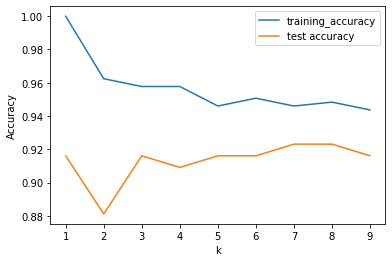

In [30]:
plt.plot(neighbors_setting,training_accuracy,label="training_accuracy")
plt.plot(neighbors_setting,test_accuracy,label="test accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()


In [36]:
print ("For last k {}: \nscore for training accuracy is : {:.2f} \nscore for test accuracy is: {:.2f}"
       .format(k,knn.score(X_train,y_train),knn.score(X_test,y_test)))

For last k 9: 
score for training accuracy is : 0.94 
score for test accuracy is: 0.92


Notice how the using K=7 gives better accuracy than K=1 on test data, indicating how k=1overfits the training data.